<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300P3%ED%8C%A8%ED%84%B4%EC%9D%B8%EC%8B%9DC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2. 다양한 패턴의 2차원 상의 점을 구분해 내는 방법

## Step 0. 데이터 소개 및 학습목표

**데이터는 아래와 같은 생성 데이터를 기반으로 합니다.**



- 선형 관계를 가진 클러스터

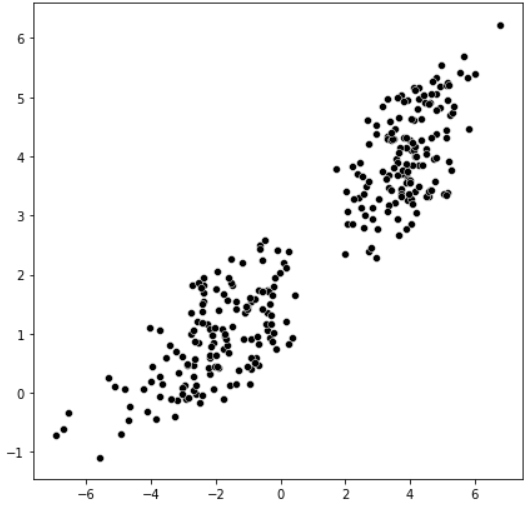

- 비선형 관계를 가진 클러스터
 - Concentric circles
 - Interleaving half circles
 - Spiral


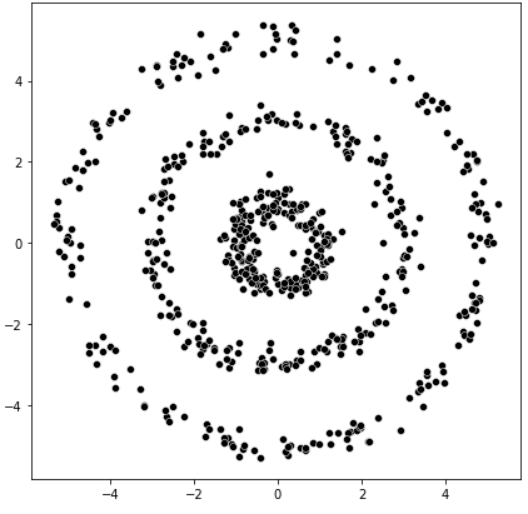

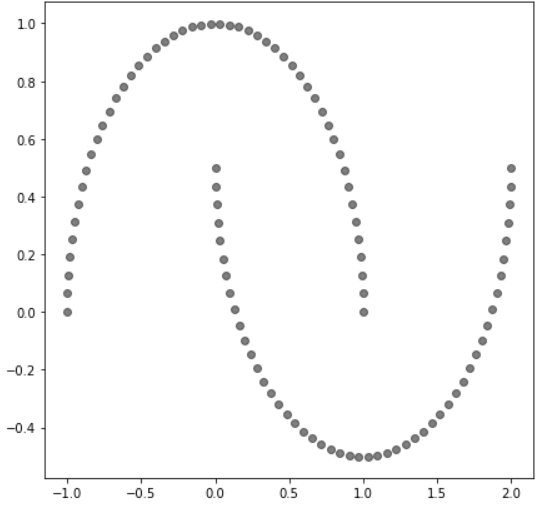

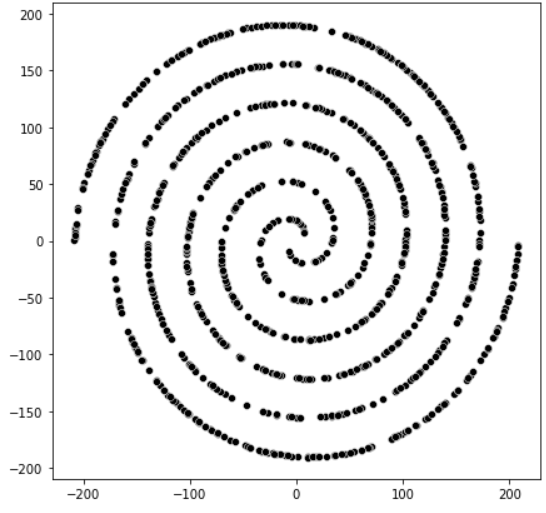

- 아래는 데이터를 생성할 때 가정된 클러스터 정보입니다


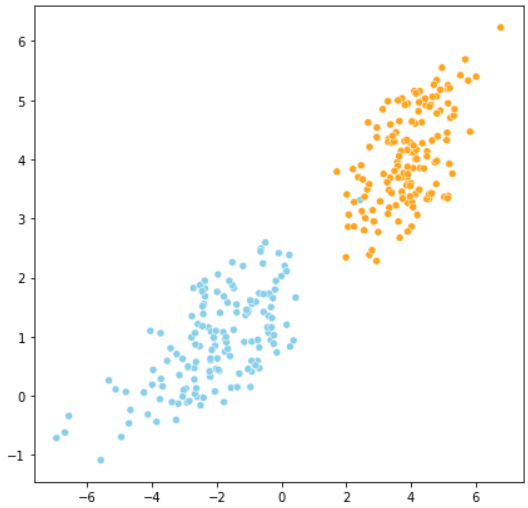

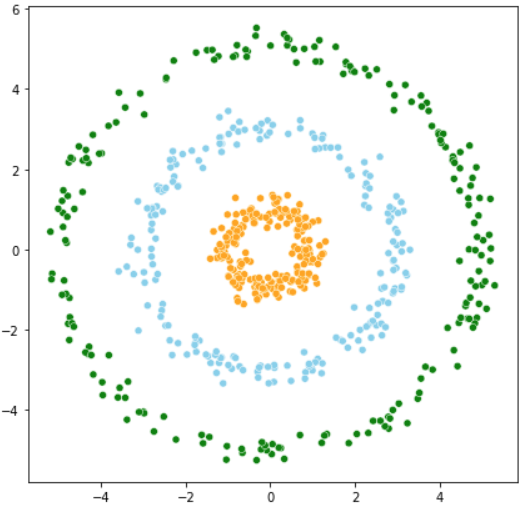

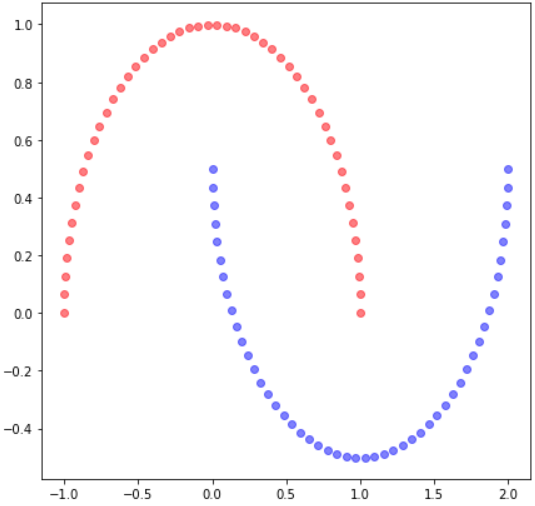

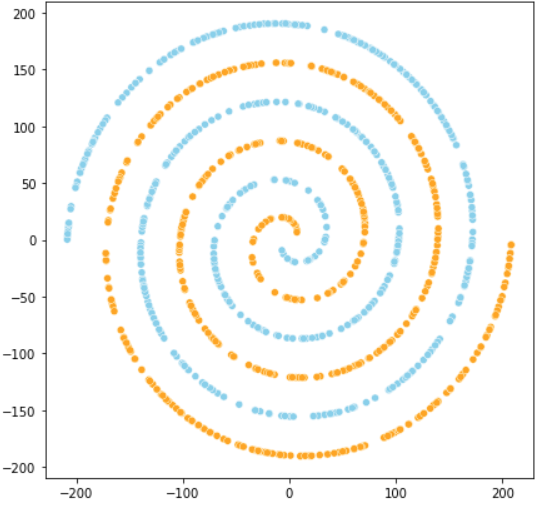

- 설명변수만을 가지고 다양한 데이터의 패턴을 잡아내어 클러스터를 구분해내거나 차원을 축소하는 것이 본 강의의 목적입니다.
- 비지도적 학습방법을 활용하여 데이터 생성시에 가정된 클러스터 정보와 최대한 비슷하게 클러스터를 구분해 내고자 하며, 이를 위하여 Principal Component를 활용합니다.


### **학습목표**
```
- 비지도학습의 개념을 이해.
- Principal Component에 대한 개념과 목적을 이해.
- 선형 패턴과 비선형 패턴의 차이와 이에 따른 접근방법 이해.
- 비선형 패턴 데이터를 다루기 위한 Kernel PCA 이해.
- 분석 상황에서의 Principal Componenet 활용.
``` 

##Step 1. 패턴 데이터 생성

###문제 1. 그림을 바탕으로 데이터 생성하기 - 선형 관계

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification

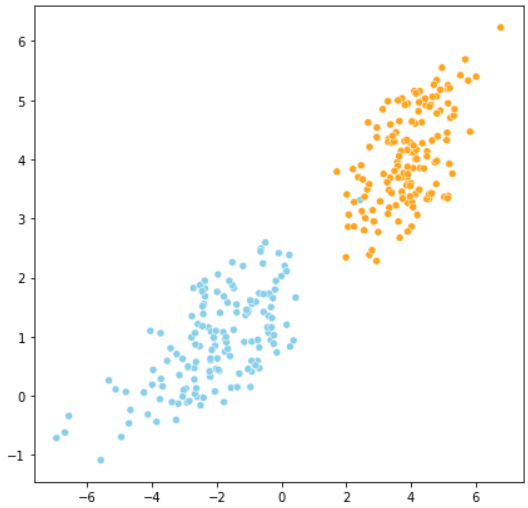

In [ ]:
##(문제) sklearn.datasets.make_classification을 활용하여 위의 그림과 같은 데이터를 생성합니다.
# 두 클러스터를 모두 합쳐 관측치의 개수는 300개입니다.
# 두 클러스터가 대부분의 점들이 잘 구분되며 두 클러스터 모두 우상향 하는 모습을 가져야 합니다. 데이터가 정확히 같을 필요는 없습니다.

X_1, y_1 = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, n_classes=2, class_sep=3)

In [ ]:
X_1

array([[-1.79271412,  2.51308491],
       [ 4.11847426,  3.54298133],
       [-3.03476542,  2.91207763],
       [-2.82552573,  3.11942781],
       [-2.78929034,  2.98402641],
       [-4.29200376,  3.42344133],
       [-2.5223934 ,  2.78246612],
       [ 3.73611591,  3.43173652],
       [-4.40198918,  3.36540073],
       [-2.64981268,  2.6302254 ],
       [-3.50982718,  2.92714296],
       [ 3.04497483,  3.09339526],
       [ 4.54143899,  3.75097841],
       [-2.36927445,  2.78898503],
       [-2.49199691,  2.79314259],
       [-0.77479707,  2.37409849],
       [ 2.60212672,  2.84440137],
       [ 3.48705541,  3.23436832],
       [-3.06348437,  2.98018656],
       [ 2.04297661,  2.55324429],
       [-3.07833703,  2.9004247 ],
       [-2.11131876,  2.62912851],
       [ 3.68920179,  3.38307789],
       [ 2.62924036,  2.85927378],
       [ 3.887063  ,  3.39932158],
       [-3.69649101,  3.33675425],
       [ 2.57364051,  2.71005131],
       [-2.8698892 ,  2.90931763],
       [-4.3501362 ,

In [ ]:
y_1

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
X_1[:, 1] = (X_1[:, 0] + X_1[:, 1])/2

In [ ]:
X_1

array([[-1.79271412e+00,  3.60185390e-01],
       [ 4.11847426e+00,  3.83072780e+00],
       [-3.03476542e+00, -6.13438966e-02],
       [-2.82552573e+00,  1.46951040e-01],
       [-2.78929034e+00,  9.73680389e-02],
       [-4.29200376e+00, -4.34281212e-01],
       [-2.52239340e+00,  1.30036361e-01],
       [ 3.73611591e+00,  3.58392621e+00],
       [-4.40198918e+00, -5.18294226e-01],
       [-2.64981268e+00, -9.79364404e-03],
       [-3.50982718e+00, -2.91342111e-01],
       [ 3.04497483e+00,  3.06918504e+00],
       [ 4.54143899e+00,  4.14620870e+00],
       [-2.36927445e+00,  2.09855290e-01],
       [-2.49199691e+00,  1.50572836e-01],
       [-7.74797071e-01,  7.99650707e-01],
       [ 2.60212672e+00,  2.72326405e+00],
       [ 3.48705541e+00,  3.36071187e+00],
       [-3.06348437e+00, -4.16489063e-02],
       [ 2.04297661e+00,  2.29811045e+00],
       [-3.07833703e+00, -8.89561661e-02],
       [-2.11131876e+00,  2.58904874e-01],
       [ 3.68920179e+00,  3.53613984e+00],
       [ 2.

In [ ]:
rng = np.random.RandomState(2)
X_1 += 2 * rng.uniform(size=X_1.shape)

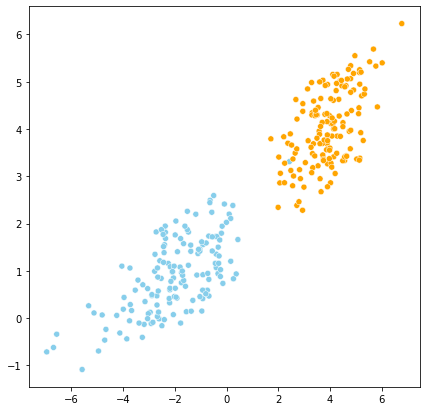

In [ ]:
## (문제) seaborn.scatterplot을 이용하고 아래의 color_code와 plot 세팅을 활용하여 플랏을 그립니다.
color_code = {0: 'Orange', 1:'Skyblue'}
plt.figure(figsize=(7, 7))

sns.scatterplot(x=X_1[:,0], y=X_1[:, 1], c=[color_code.get(i) for i in y_1])
plt.show()

### 문제 2. 그림을 바탕으로 데이터 생성하기 - 비선형 관계

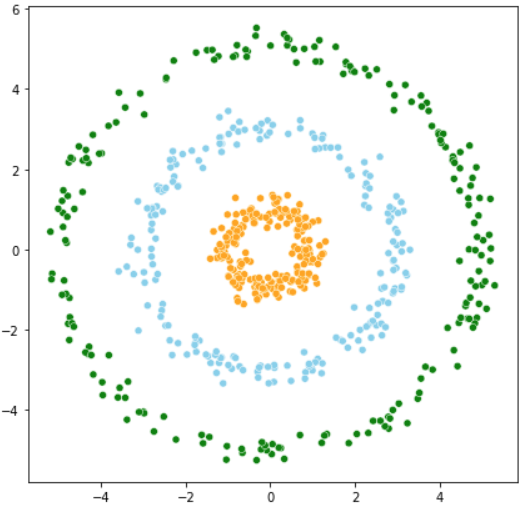

In [ ]:
##(문제) (x,y)=(r*cos(theta),r*sin(theta))임을 활용하여 위의 그림과 같은 데이터를 생성합니다.
np.random.seed(1)
def CircleXY(r, n, sigma):
  theta = np.random.uniform(low=0, high=2*np.pi, size=n)
  x_error = np.random.normal(loc=0.0, scale=sigma, size=n)
  y_error = np.random.normal(loc=0.0, scale=sigma, size=n)

  x_val = r*np.cos(theta) + x_error
  y_val = r*np.sin(theta) + y_error
  return x_val, y_val, np.repeat(r, n)

In [ ]:
##(문제) seaborn.scatterplot을 이용하고 아래의 파라미터들을 활용하여 Concentric circles 플랏을 완성합니다.
plt.figure(figsize=(7, 7))
n = 200
r_list = [1, 3, 5]
sigma = 0.2
param_lists = [(r, n, sigma) for r in r_list]
coordinates = [ CircleXY(param[0], param[1], param[2]) for param in param_lists]
color_code = {1:'Orange', 3:'Skyblue', 5:'Green'}

<Figure size 504x504 with 0 Axes>